In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
Air=pd.read_csv("/kaggle/input/air-quality-data-set/AirQuality.csv",sep=';')
Air.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

In [3]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [4]:
Air = Air.iloc[:,:-2]

In [5]:
Air.replace(to_replace=',',value='.',regex=True,inplace=True)

In [6]:
columns_to_convert = ['CO(GT)','C6H6(GT)', 'T', 'RH', 'AH']
for column in columns_to_convert:
    Air[column] = pd.to_numeric(Air[column], errors='coerce')

In [7]:
Air.replace(-200,np.nan,inplace=True)
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [8]:
Air.drop('NMHC(GT)', axis=1, inplace=True)
Air['Date'] = pd.to_datetime(Air['Date'], format='%d/%m/%Y')
Air['Time'] = pd.to_datetime(Air['Time'], format='%H.%M.%S').dt.time
Air.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  7674.000000  8991.000000  8991.000000    8991.000000  7718.000000   
mean      2.152750  1099.833166    10.083105     939.153376   246.896735   
std       1.453252   217.080037     7.449820     266.831429   212.979168   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.100000   937.000000     4.400000     734.500000    98.000000   
50%       1.800000  1063.000000     8.200000     909.000000   180.000000   
75%       2.900000  1231.000000    14.000000    1116.000000   326.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   8991.000000  7715.000000   8991.000000  8991.000000  8991.000000   
mean     835.493605   113.091251   1456.264598  1022.906128    18.317829   
std      256.817320    48.370108    346.206794   398.484288     8.832116   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      658.000000    78.000000   1227.000000   731.500000    11.800000   
50%      806.000000   109.000000   1463.000000   963.000000    17.800000   
75%      969.500000   142.000000   1674.000000  1273.500000    24.400000   
max     2683.000000   340.000000   2775.000000  2523.000000    44.600000   

                RH           AH  
count  8991.000000  8991.000000  
mean     49.234201     1.025530  
std      17.316892     0.403813  
min       9.200000     0.184700  
25%      35.800000     0.736800  
50%      49.600000     0.995400  
75%      62.500000     1.313700  
max      88.700000     2.231000

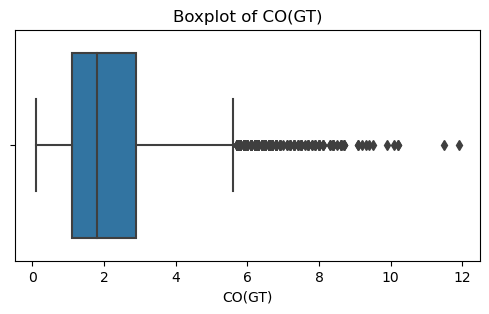

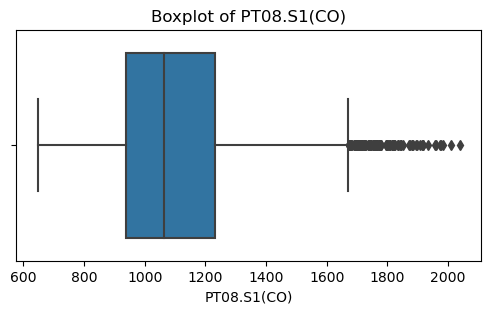

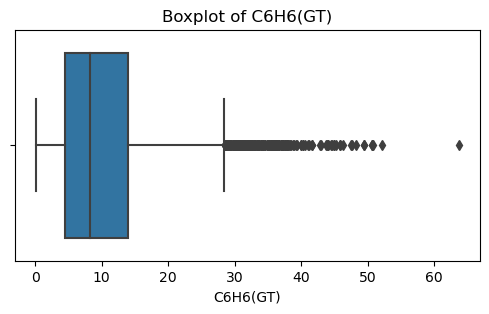

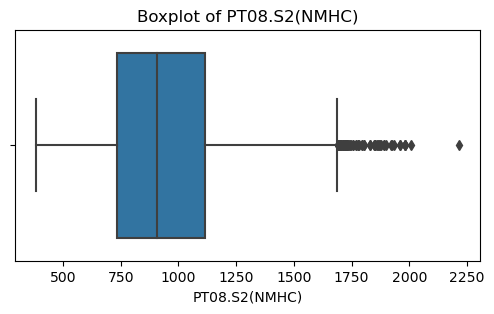

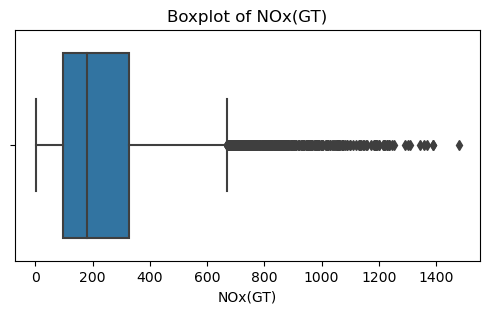

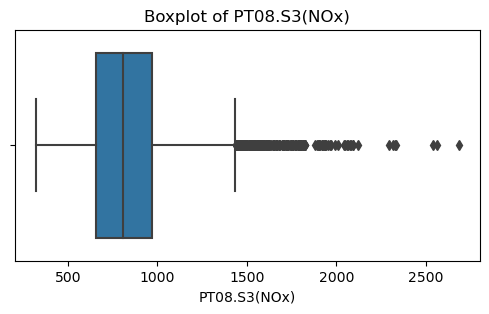

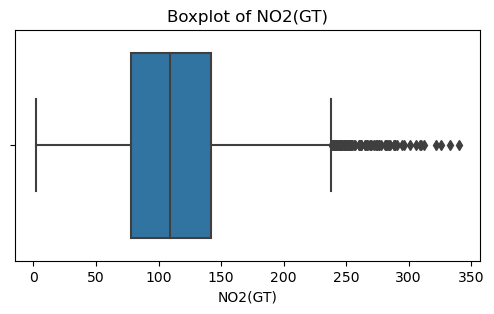

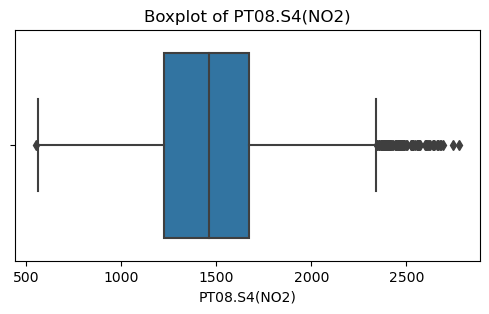

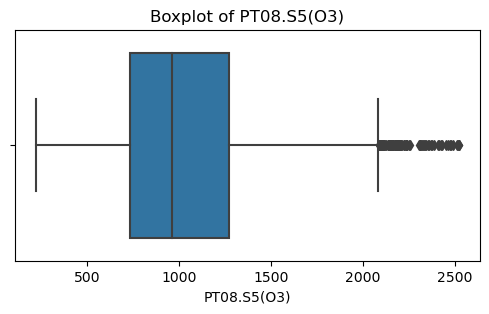

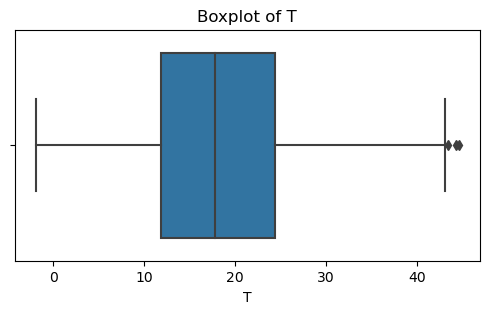

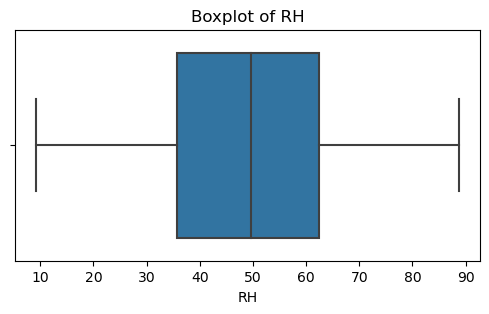

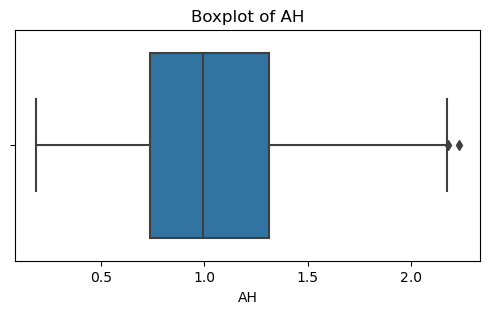

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
numerical_columns = Air.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=Air[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

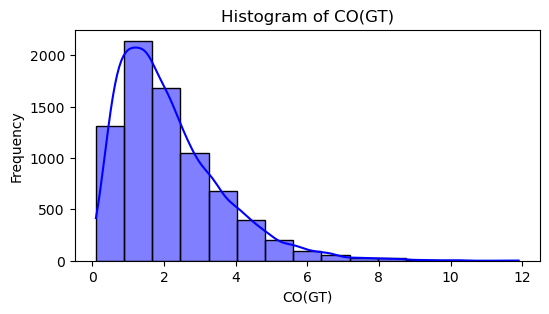

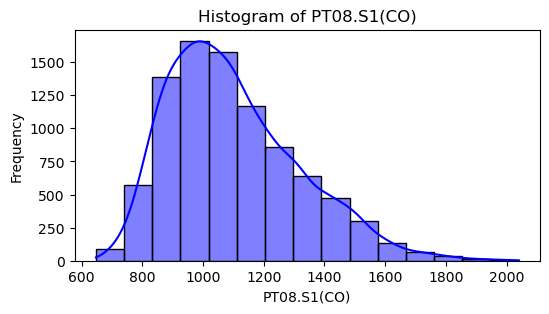

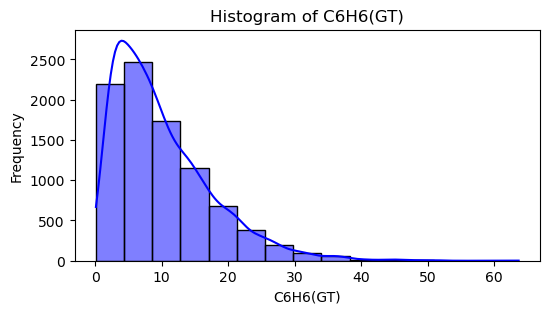

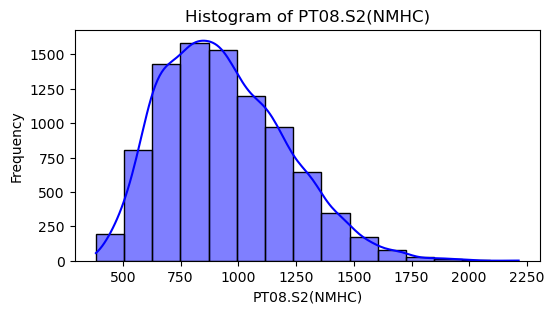

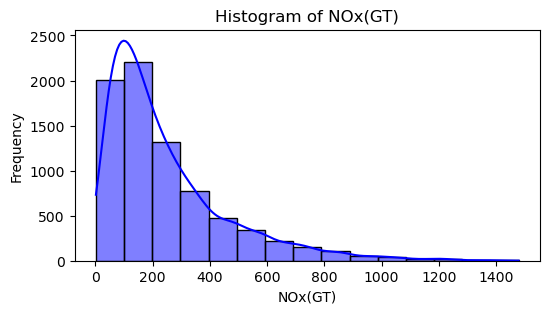

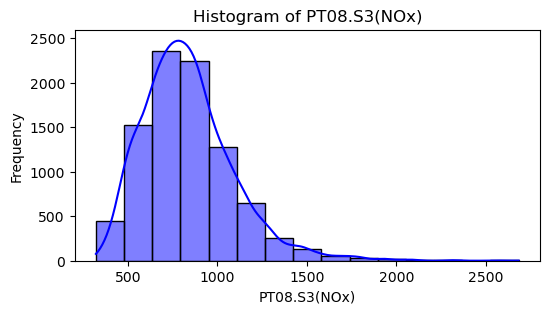

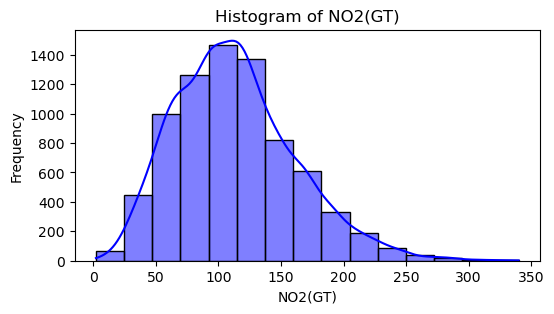

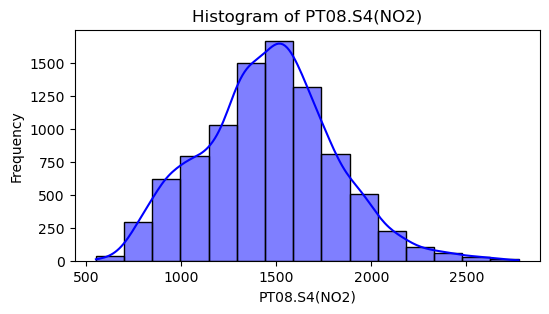

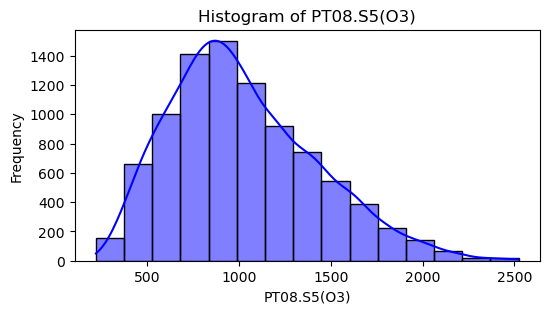

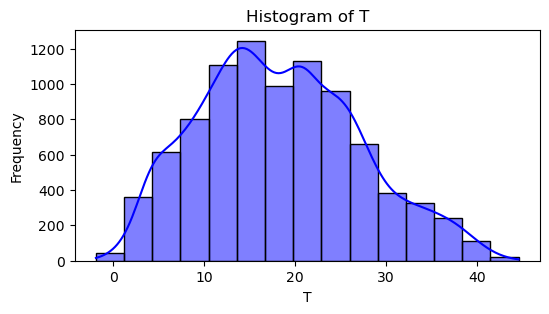

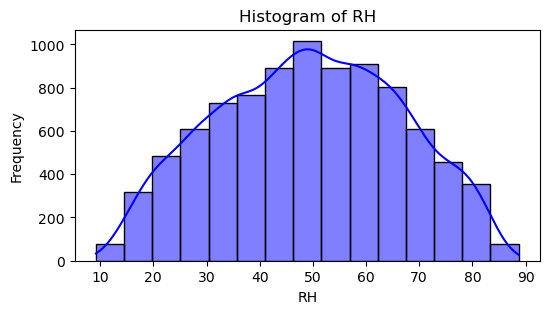

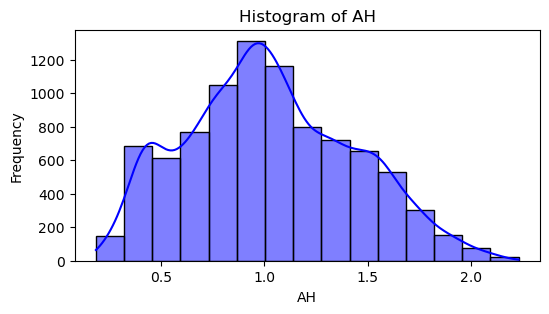

In [10]:
for column in numerical_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(x=Air[column], stat="count", color="blue", bins=15, kde={'alpha': 0.5})
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

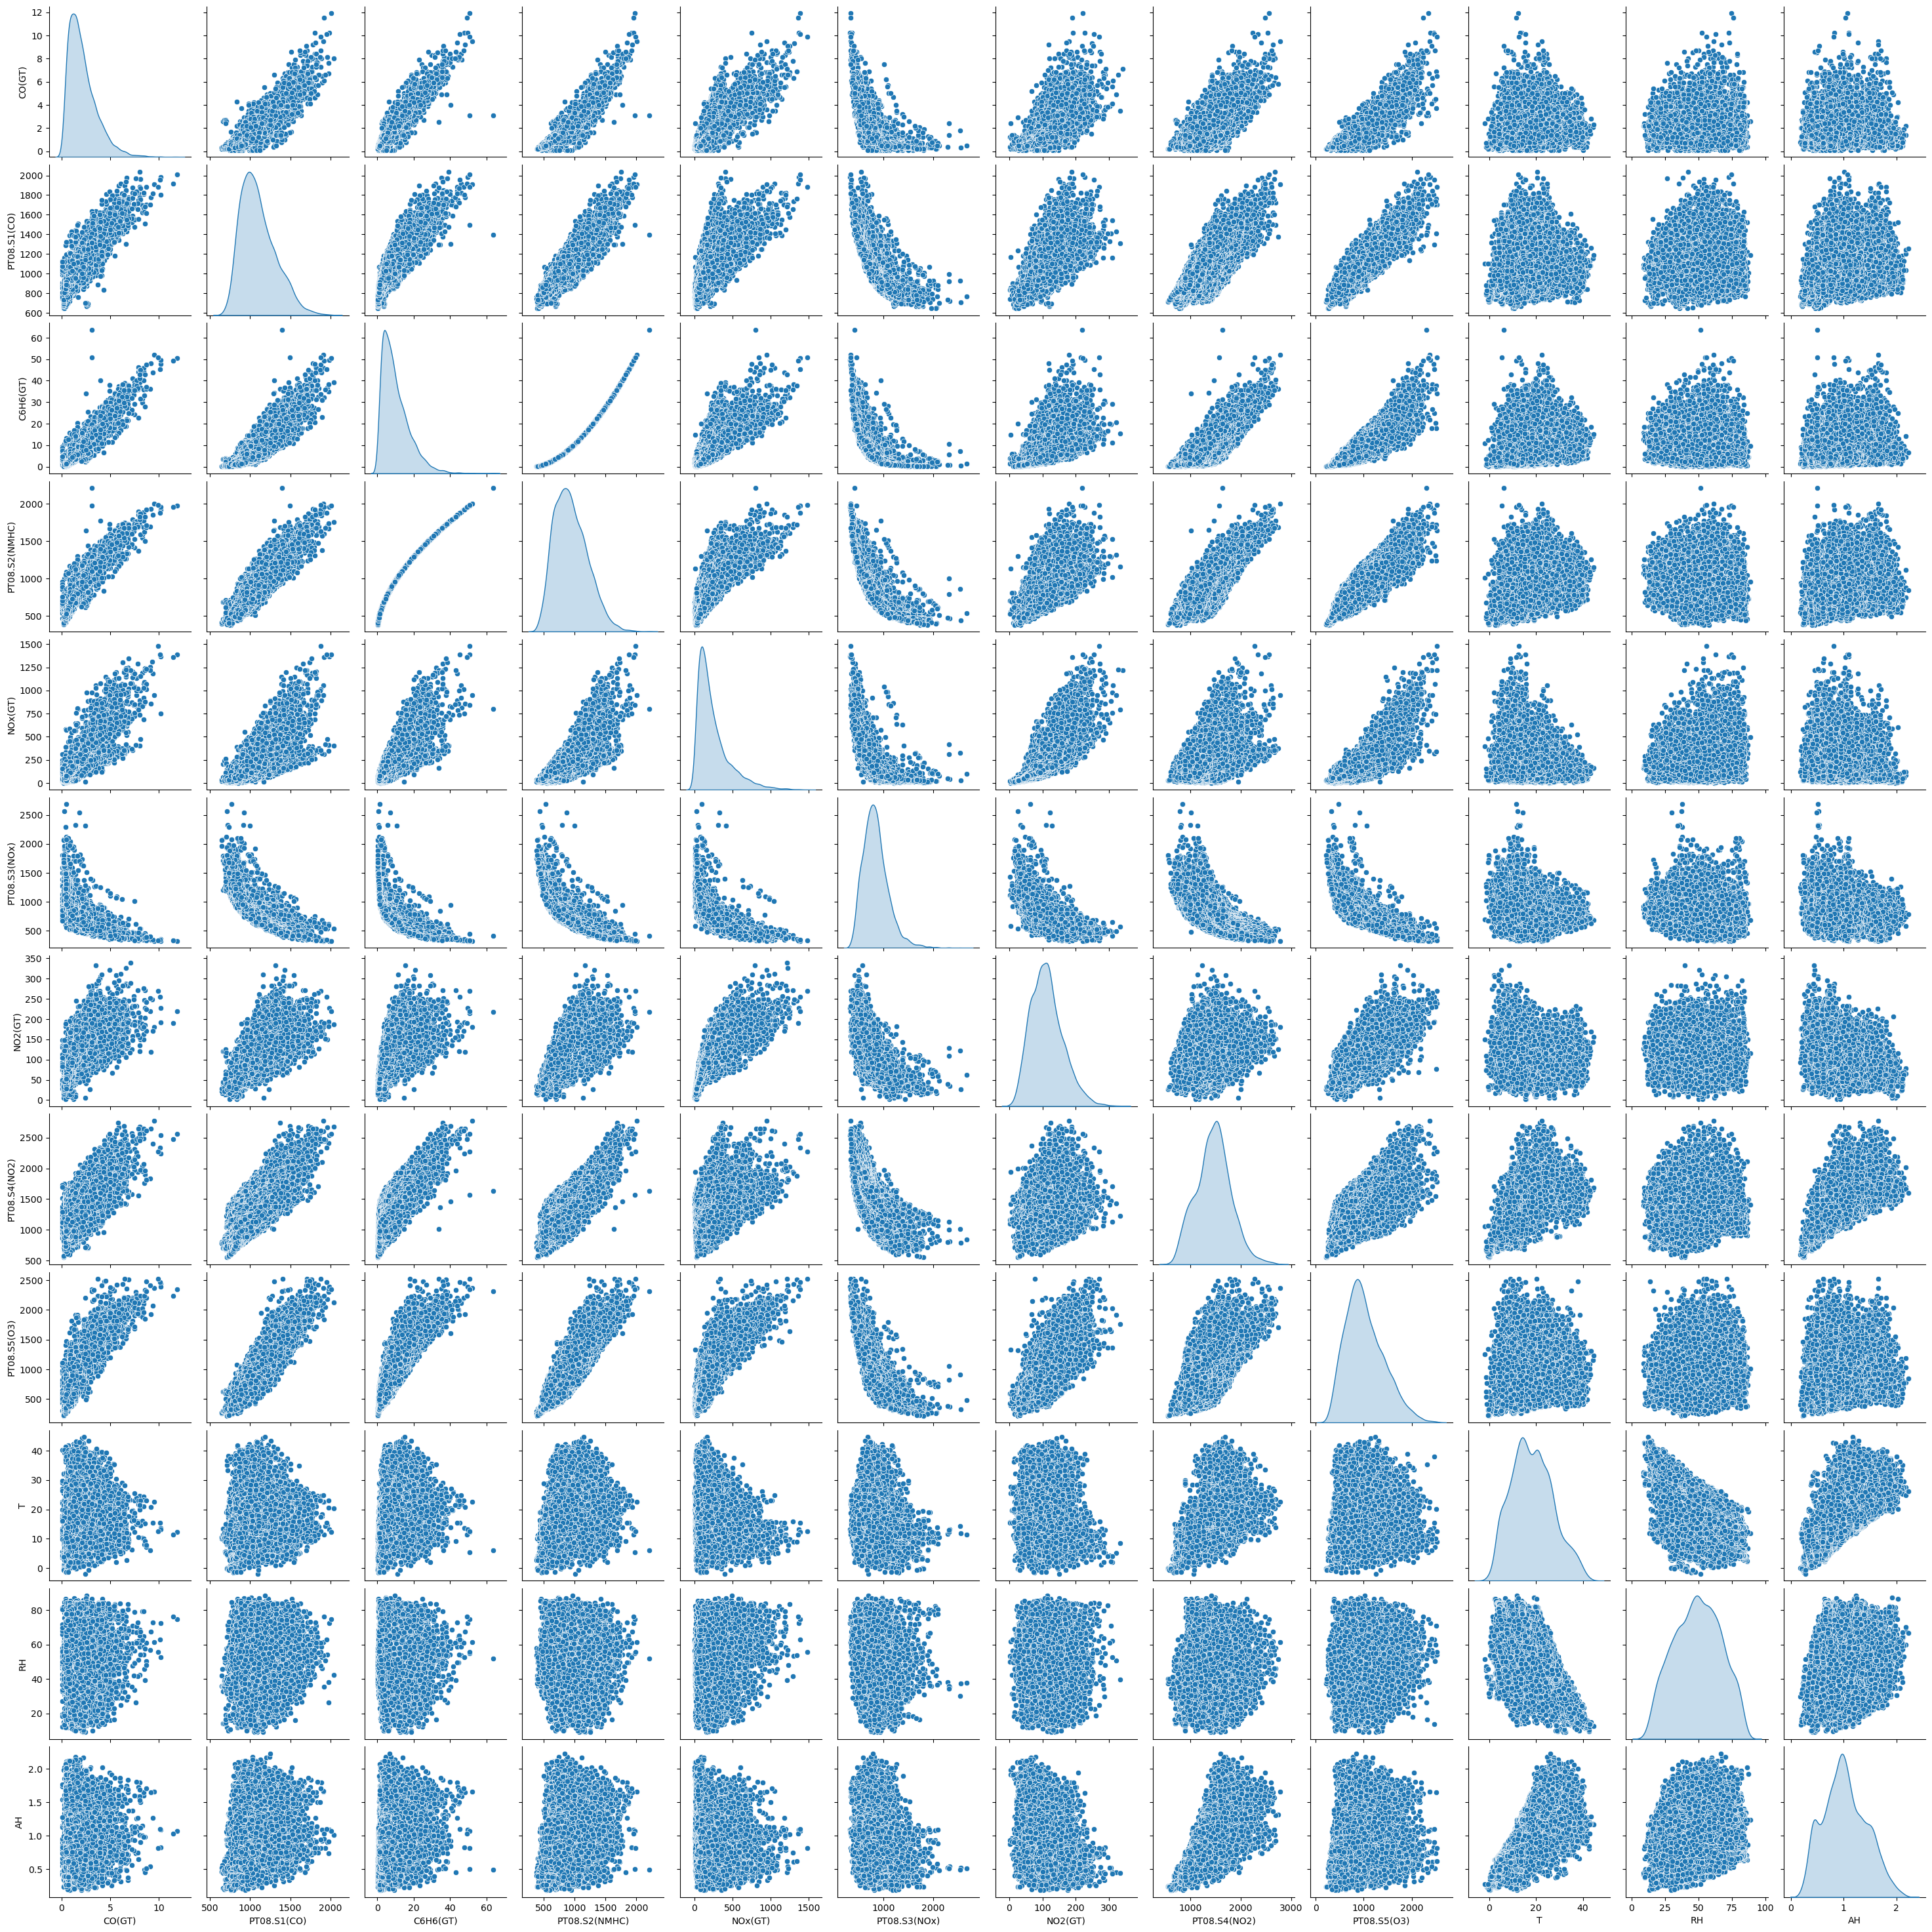

In [11]:
sns.pairplot(Air, diag_kind='kde')
plt.show()

In [13]:
Air.isnull().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [15]:
Air = Air.apply(lambda column: column.interpolate(method="linear") if column.dtype != 'datetime64[ns]' and column.dtype != '<m8[ns]' else column)

In [16]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9471 non-null   float64       
 3   PT08.S1(CO)    9471 non-null   float64       
 4   C6H6(GT)       9471 non-null   float64       
 5   PT08.S2(NMHC)  9471 non-null   float64       
 6   NOx(GT)        9471 non-null   float64       
 7   PT08.S3(NOx)   9471 non-null   float64       
 8   NO2(GT)        9471 non-null   float64       
 9   PT08.S4(NO2)   9471 non-null   float64       
 10  PT08.S5(O3)    9471 non-null   float64       
 11  T              9471 non-null   float64       
 12  RH             9471 non-null   float64       
 13  AH             9471 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.0+ MB


In [17]:
Air.isnull().sum()

Date             114
Time             114
CO(GT)             0
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64

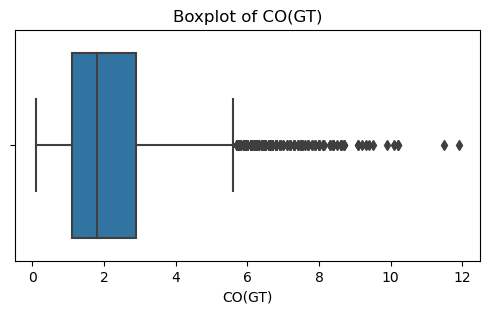

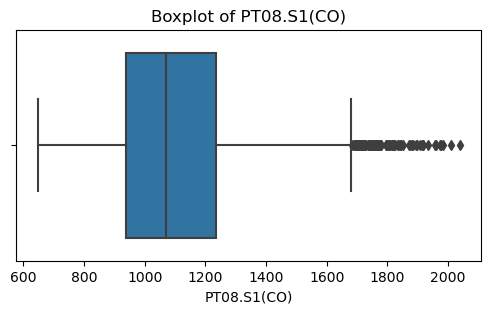

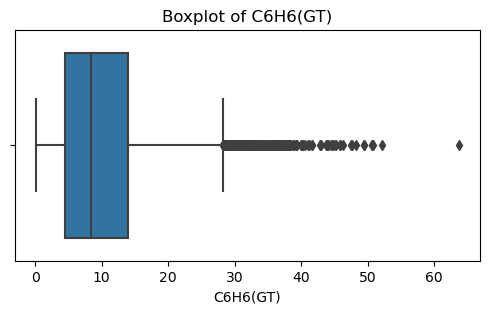

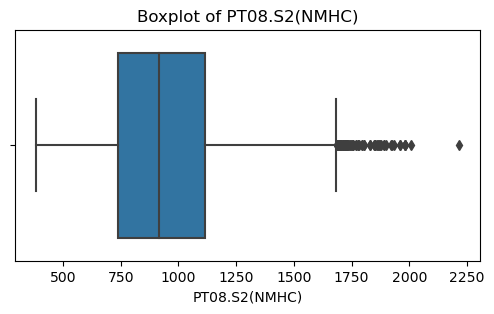

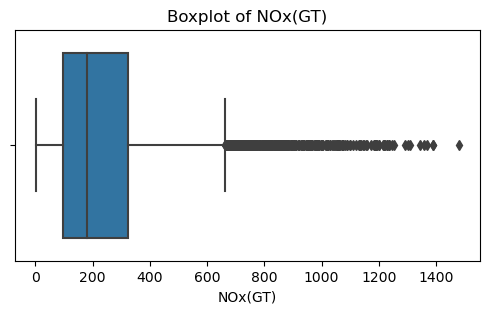

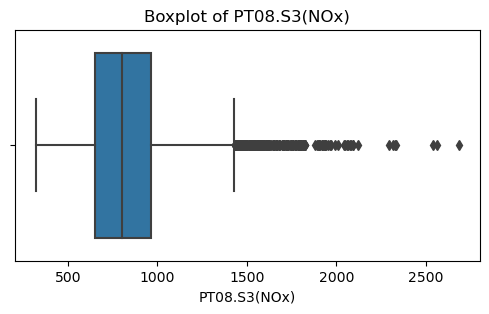

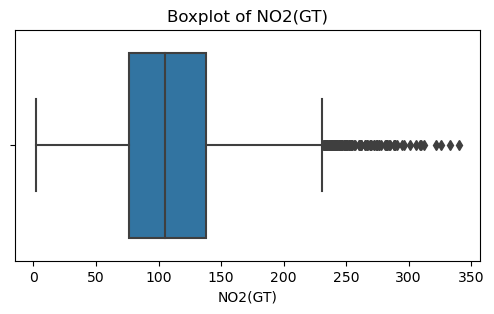

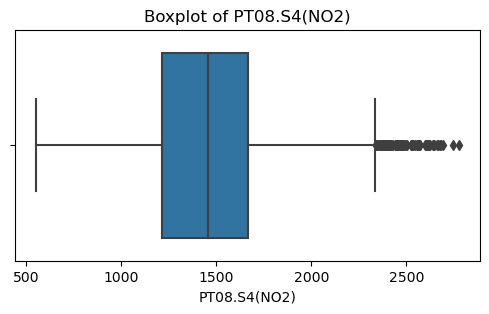

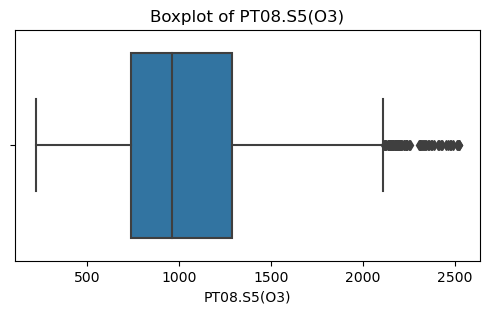

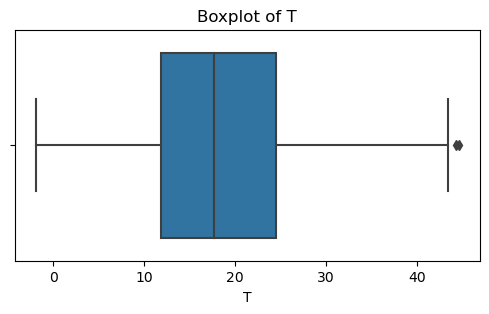

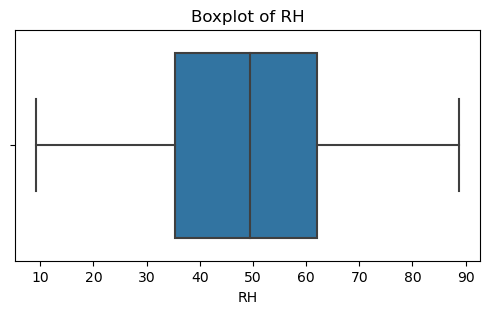

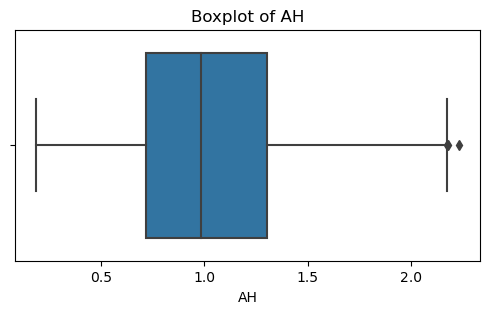

In [18]:
numerical_columns = Air.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=Air[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

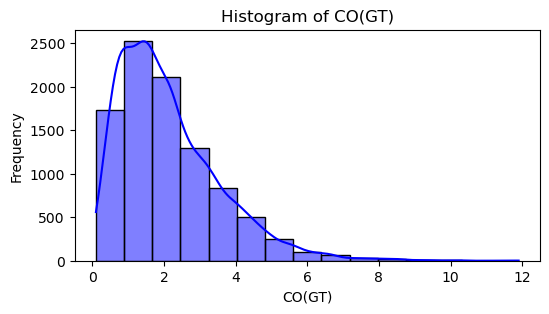

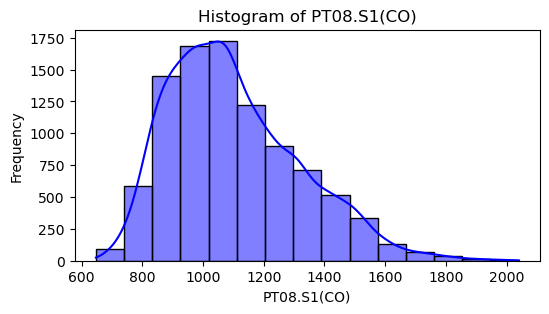

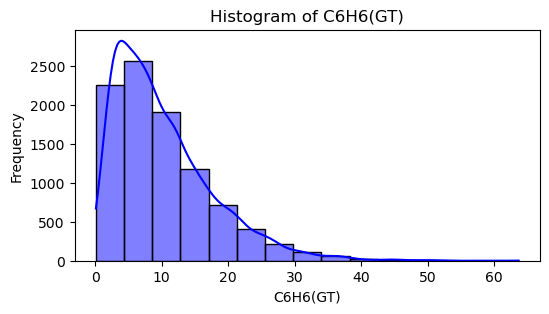

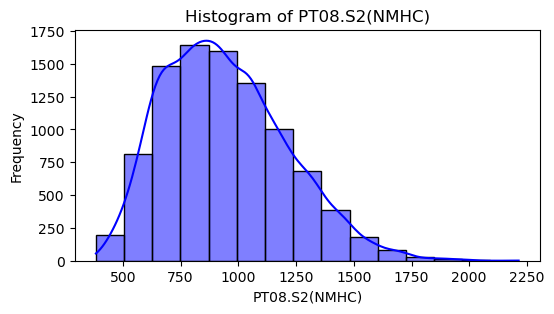

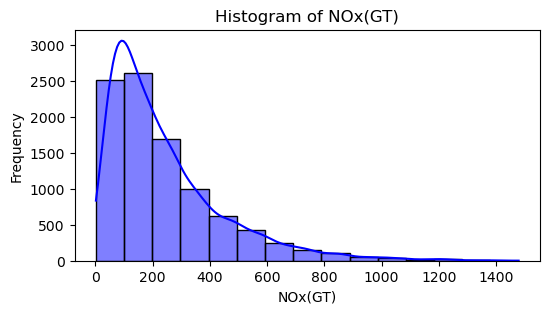

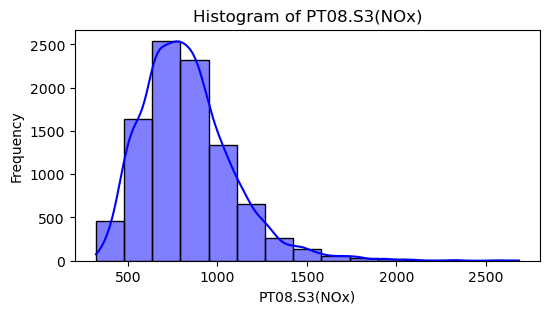

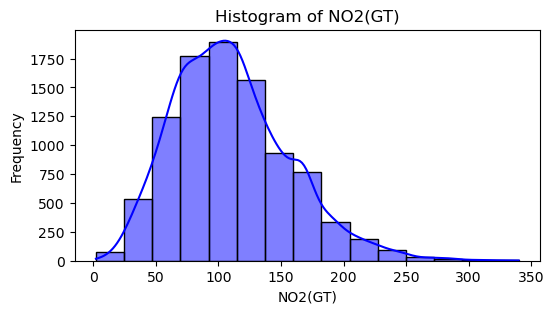

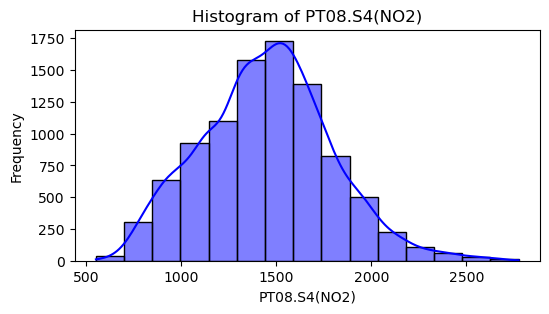

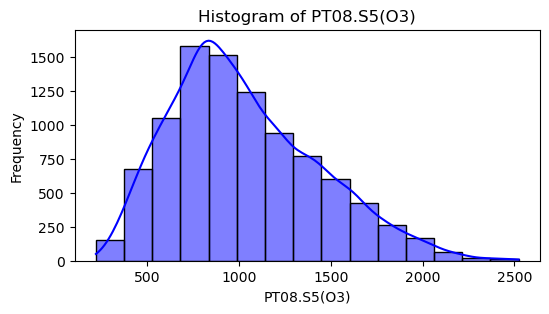

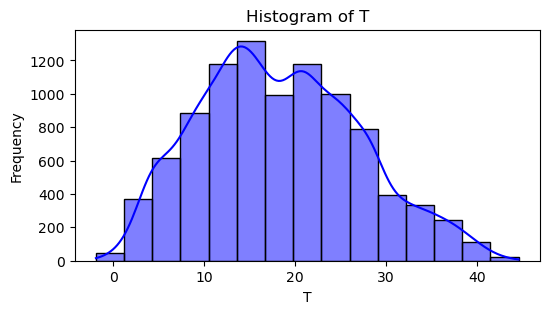

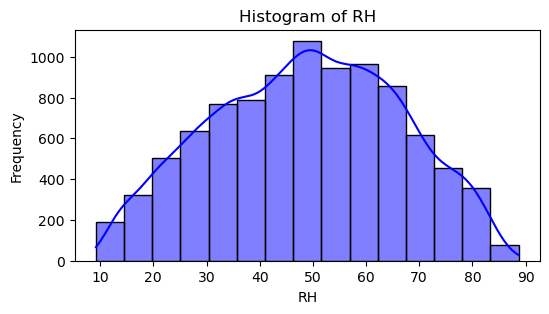

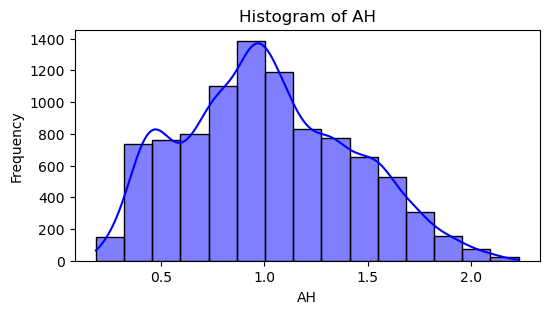

In [19]:
for column in numerical_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(x=Air[column], stat="count", color="blue", bins=15, kde={'alpha': 0.5})
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
format(len(Air[Air.duplicated()]))

'113'

<AxesSubplot:>

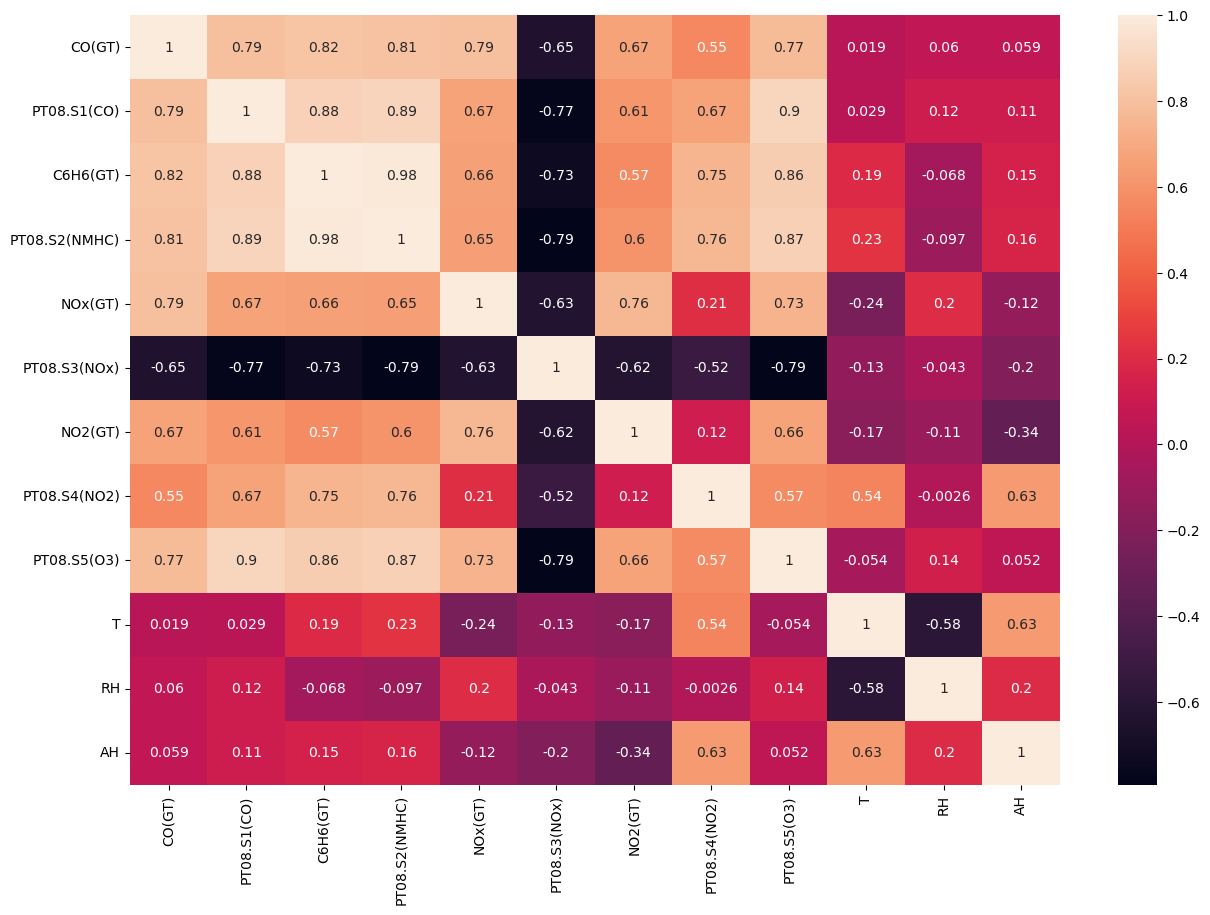

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(Air.corr(method='pearson', min_periods=1),annot=True)

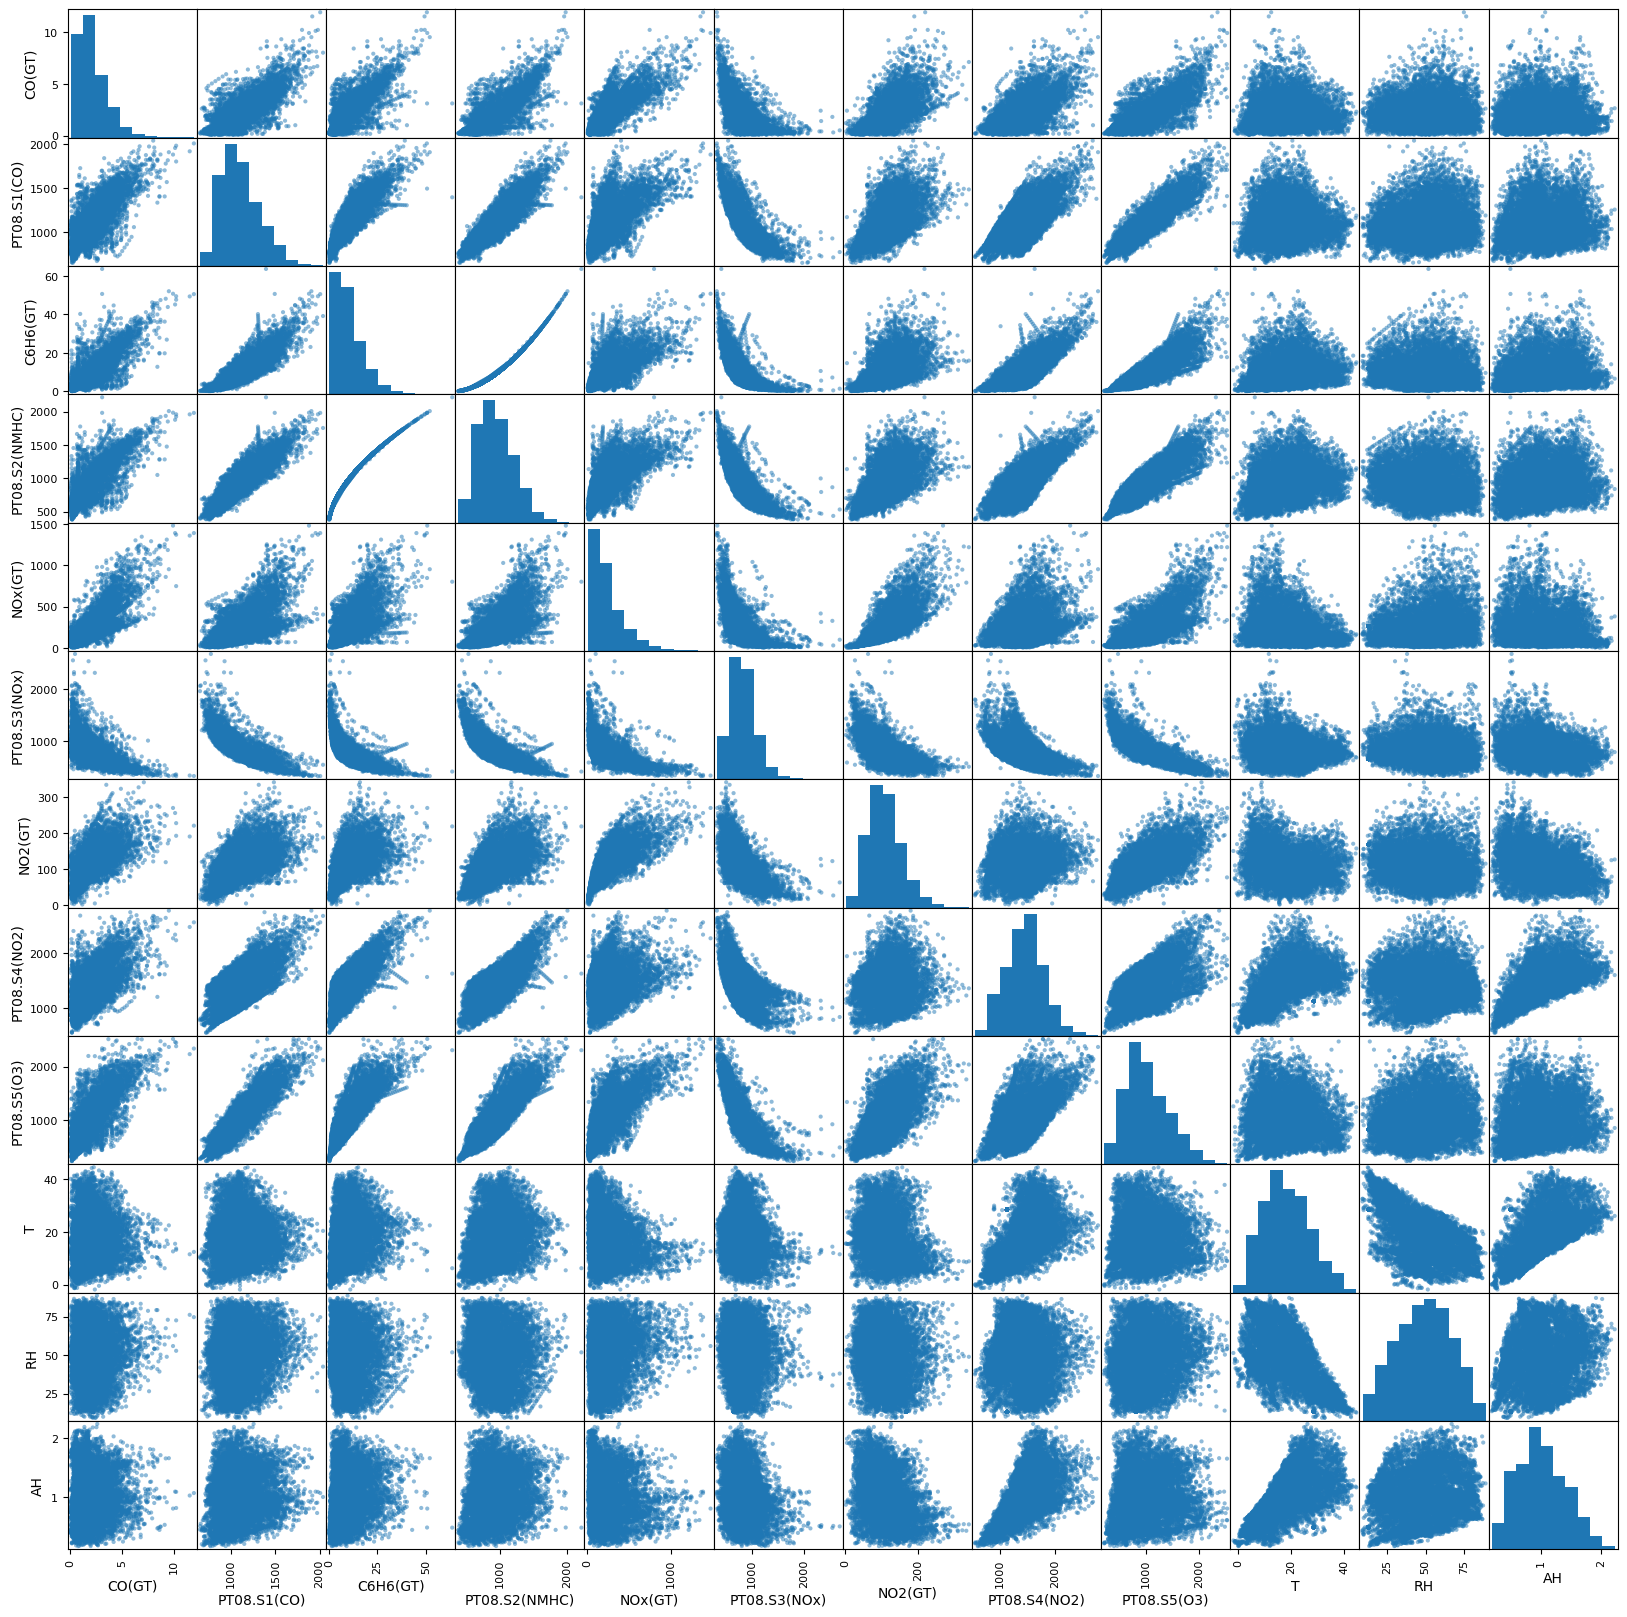

In [22]:
Air.corr()
pd.plotting.scatter_matrix(Air,figsize=[20,20])
plt.show()